In [1]:
from transformers import pipeline
from datasets import load_dataset

# Create the pipeline
pipe = pipeline(
    task="depth-estimation",
    model="depth-anything/Depth-Anything-V2-Small-hf",
    device="cuda",
)
# Load the dataset
dataset = load_dataset("ntudlcv/dlcv_2024_final1")

/home/tomchen/mambaforge/envs/final/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
from torch.utils.data import DataLoader


# Custom collate function to handle dictionaries with PIL images
def collate_fn(batch):
    images = [item["image"] for item in batch]
    other_properties = [
        {k: v for k, v in item.items() if k != "image"} for item in batch
    ]
    return images, other_properties


# Create a DataLoader for the dataset with the custom collate function
data_loader = DataLoader(
    dataset["train"], batch_size=8, shuffle=True, collate_fn=collate_fn
)

# Load only one batch
images, other_properties = next(iter(data_loader))

# Get depth maps for the images
depths = [pipe(image)["depth"] for image in images]

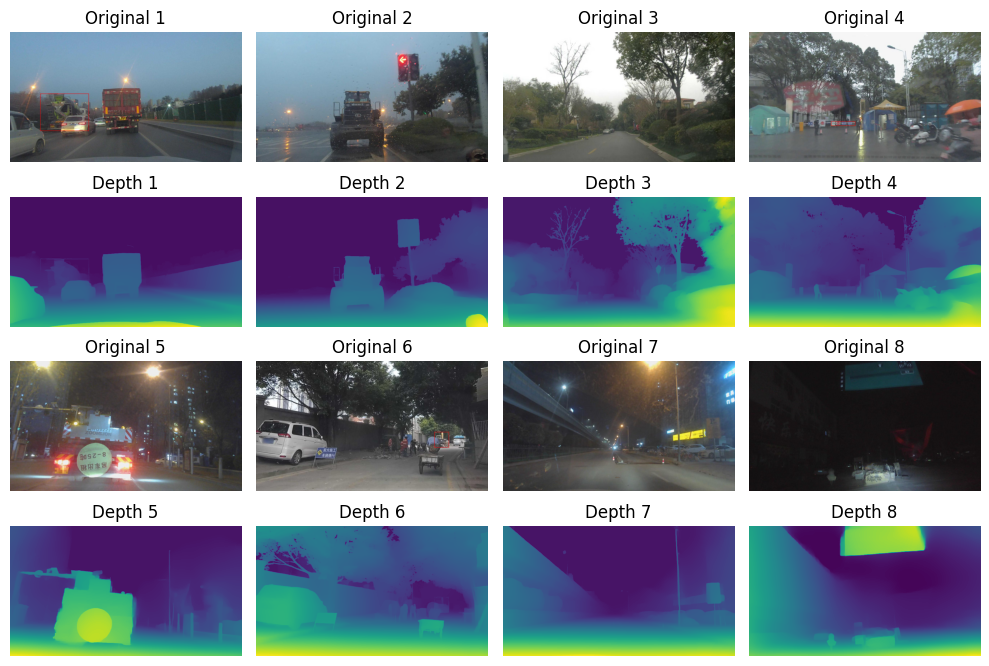

In [10]:
import matplotlib.pyplot as plt

# Plot a grid showing the original images and the depth maps
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 7))

for i, (image, depth) in enumerate(zip(images, depths)):
    row = (i // 4) * 2
    col = i % 4

    axes[row, col].imshow(image)
    axes[row, col].axis("off")
    axes[row, col].set_title(f"Original {i+1}")

    axes[row + 1, col].imshow(depth, cmap="viridis")
    axes[row + 1, col].axis("off")
    axes[row + 1, col].set_title(f"Depth {i+1}")

plt.tight_layout(h_pad=0)
plt.show()